<a href="https://colab.research.google.com/github/Rhythm1821/CNN-Image-Classification/blob/main/DeepCNNImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 Get the data

### 1.1 Import dependencies

In [49]:
import requests, zipfile
import numpy as np
from zipfile import ZipFile
from pathlib import Path
import cv2,os,imghdr
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
device = 'cuda' if tf.test.is_gpu_available() else 'cpu'
device

'cpu'

### 1.2 Import data

In [2]:
data_path = Path('data/')
happy_path = Path(data_path / 'happy')
sad_path = Path(data_path / 'sad')

if happy_path.is_dir():
  print(f'{happy_path} path already exists')
else:
  print(f'Creating {happy_path} path')
  happy_path.mkdir(parents=True,exist_ok=True)

with open('Happy.zip','wb') as f:
  url = 'https://github.com/Rhythm1821/Colab-Project-Data/raw/main/image-classification/Happy.zip' #change the url from
  request = requests.get(url)
  f.write(request.content)

with ZipFile('Happy.zip','r') as zip_file:
  print('unzipping the data')
  zip_file.extractall(happy_path)

with open('Sad.zip','wb') as f:
  url = 'https://github.com/Rhythm1821/Colab-Project-Data/raw/main/image-classification/Sad.zip'
  request = requests.get(url)
  f.write(request.content)

with ZipFile('Sad.zip','r') as zip_file:
  print('unzipping the data')
  zip_file.extractall(sad_path)

Creating data/happy path
unzipping the data
unzipping the data


In [3]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its content"""
  for dirpath, dirname, filename in os.walk(dir_path):
    print(f'There are {len(dirname)} directories and {len(filename)} images in {dirpath}')

walk_through_dir(data_path)

There are 2 directories and 0 images in data
There are 0 directories and 151 images in data/happy
There are 0 directories and 148 images in data/sad


### 1.3 Remove dodgy images

In [4]:
img_exts = ['jpeg','jpg','png','bmp']

In [5]:
for image_class in os.listdir(data_path):
    for image in os.listdir(os.path.join(data_path, image_class)):
        image_path = os.path.join(data_path, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in ext list data/happy/posite-picture-of-diverse-joyful-young-people-expressing-happiness-over-blue.jpg
Image not in ext list data/happy/vector.svg
Image not in ext list data/happy/depositphotos_124529770-stock-photo-happy-faces-collage.jpg
Image not in ext list data/happy/vector13.svg
Image not in ext list data/happy/75369829-happy-smiling-faces.jpg
Image not in ext list data/happy/happy-home.jpg
Image not in ext list data/happy/vector10.svg
Image not in ext list data/happy/vector8.svg
Image not in ext list data/happy/anzan-a-the-boy-is-leaning-against-the-coconut-tree-the-boy-has-a-2131260151.jpg
Image not in ext list data/happy/stock-photo-collage-of-portrait-of-many-smiling-faces-277752143.jpg
Image not in ext list data/happy/vector3.svg
Image not in ext list data/happy/65647168.jpg
Image not in ext list data/happy/appy-people-a-group-of-teenagers-looking-down-with-a-happy-smile-on-his-face.jpg
Image not in ext list data/happy/vector6.svg
Image not in ext list data/happy/

In [6]:
from PIL import Image
import os

def get_image_sizes(folder_path):
    image_sizes = {}

    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    for file_name in files:
        # Check if the file is an image (you can add more image extensions as needed)
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
            file_path = os.path.join(happy_path, file_name)

            try:
                # Open the image using PIL
                with Image.open(file_path) as img:
                    # Get the size of the image
                    width, height = img.size
                    file_size = os.path.getsize(file_path)

                    if file_size < 10240:  # Size less than 10KB (10KB = 10240 bytes)
                        os.remove(file_path)
                        print(f"Removed {file_name} - Size: {file_size} bytes")
                    else:
                        image_sizes[file_name] = (width, height)
            except Exception as e:
                # Handle any exceptions (e.g., if the file is not a valid image)
                print(f"Error processing {file_name}: {e}")

    return image_sizes

# Provide the path to the folder containing the images
folder_path = '/content/data/happy'
image_sizes = get_image_sizes(folder_path)

# Display the image sizes
for file_name, size in image_sizes.items():
    print(f"{file_name}: {size[0]}x{size[1]}")


Removed images10.jpg - Size: 6639 bytes
Removed image24.jpeg - Size: 5575 bytes
Removed image31.jpeg - Size: 7230 bytes
Removed images25.jpg - Size: 8557 bytes
Removed images24.jpg - Size: 6708 bytes
Removed 368a2a55887be8795c17a2fac55e65b4--happy-faces-a-smile.jpg - Size: 6342 bytes
Removed image5.jpeg - Size: 2933 bytes
Removed image28.jpeg - Size: 8350 bytes
Removed image7.jpeg - Size: 4319 bytes
Removed image3.jpeg - Size: 2559 bytes
Removed images2.jpg - Size: 2165 bytes
Removed image32.jpg - Size: 1869 bytes
Removed images.jpg - Size: 1800 bytes
Removed AGvuzYZVi5jDA5tSL2IkzR2OVn2EWWzMkXl8tds6DVjUs64-c-mo.jpg - Size: 739 bytes
Removed image27.jpeg - Size: 6697 bytes
Removed image12.jpeg - Size: 3063 bytes
Removed images20.jpg - Size: 6967 bytes
Removed images21.jpg - Size: 8214 bytes
Removed images8.jpg - Size: 7113 bytes
Removed images3.jpg - Size: 9249 bytes
Removed images7.jpg - Size: 9281 bytes
Removed image2.jpeg - Size: 5881 bytes
Removed image8.jpeg - Size: 4717 bytes
Remo

In [7]:
from PIL import Image
import os

def get_image_sizes(folder_path):
    image_sizes = {}

    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    for file_name in files:
        # Check if the file is an image (you can add more image extensions as needed)
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
            file_path = os.path.join(sad_path, file_name)

            try:
                # Open the image using PIL
                with Image.open(file_path) as img:
                    # Get the size of the image
                    width, height = img.size
                    file_size = os.path.getsize(file_path)

                    if file_size < 10240:  # Size less than 10KB (10KB = 10240 bytes)
                        os.remove(file_path)
                        print(f"Removed {file_name} - Size: {file_size} bytes")
                    else:
                        image_sizes[file_name] = (width, height)
            except Exception as e:
                # Handle any exceptions (e.g., if the file is not a valid image)
                print(f"Error processing {file_name}: {e}")

    return image_sizes

# Provide the path to the folder containing the images
folder_path = '/content/data/sad'
image_sizes = get_image_sizes(folder_path)

# Display the image sizes
for file_name, size in image_sizes.items():
    print(f"{file_name}: {size[0]}x{size[1]}")


Removed images10.jpg - Size: 7105 bytes
Removed image24.jpeg - Size: 5147 bytes
Removed images25.jpg - Size: 7894 bytes
Removed images24.jpg - Size: 10224 bytes
Removed image5.jpeg - Size: 2219 bytes
Removed image28.jpeg - Size: 4938 bytes
Removed image7.jpeg - Size: 2321 bytes
Removed image3.jpeg - Size: 4506 bytes
Removed images2.jpg - Size: 2572 bytes
Removed image15.jpeg - Size: 4914 bytes
Removed b9113bb598f9f2628ca52d1ce0e4cb6a--huge-eyes-sad-eyes.jpg - Size: 7899 bytes
Removed images.jpg - Size: 8214 bytes
Removed AGvuzYZVi5jDA5tSL2IkzR2OVn2EWWzMkXl8tds6DVjUs64-c-mo.jpg - Size: 739 bytes
Removed images17.jpg - Size: 5790 bytes
Removed image27.jpeg - Size: 5182 bytes
Removed image12.jpeg - Size: 3705 bytes
Removed images20.jpg - Size: 6261 bytes
Removed images21.jpg - Size: 7451 bytes
Removed images8.jpg - Size: 7647 bytes
Removed images3.jpg - Size: 2401 bytes
Removed images7.jpg - Size: 9959 bytes
Removed image21.jpeg - Size: 6271 bytes
Removed images5.jpg - Size: 9393 bytes
Re

In [8]:

def check_image_sizes(folder_path,file_path):
    small_images = []

    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    for file_name in files:
        # Check if the file is an image (you can add more image extensions as needed)
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
            file_path = file_path

            try:
                # Get the size of the image
                file_size = os.path.getsize(file_path)

                if file_size < 10240:  # Size less than 10KB (10KB = 10240 bytes)
                    small_images.append(file_name)
            except Exception as e:
                # Handle any exceptions (e.g., if the file is not a valid image)
                print(f"Error processing {file_name}: {e}")

    return small_images

In [9]:
# Provide the path to the folder containing the images
file_path = os.path.join(sad_path, file_name)
folder_path = '/content/data/sad'
small_images = check_image_sizes(folder_path,file_path)

if small_images:
    print("The following images are less than 10KB in sad folder:")
    for image in small_images:
        print(image)
else:
    print("No images found with a size less than 10KB in sad folder.")

No images found with a size less than 10KB in sad folder.


In [10]:
import os

def check_image_sizes(folder_path):
    small_images = []

    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    for file_name in files:
        # Check if the file is an image (you can add more image extensions as needed)
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
            file_path = os.path.join(happy_path, file_name)

            try:
                # Get the size of the image
                file_size = os.path.getsize(file_path)

                if file_size < 10240:  # Size less than 10KB (10KB = 10240 bytes)
                    small_images.append(file_name)
                    # print(file_name)
            except Exception as e:
                # Handle any exceptions (e.g., if the file is not a valid image)
                print(f"Error processing {file_name}: {e}")

    return small_images

# Provide the path to the folder containing the images
folder_path = '/content/data/happy'
small_images = check_image_sizes(folder_path)

if small_images:
    print("The following images are less than 10KB:")
    for image in small_images:
        print(image)
else:
    print("No images found with a size less than 10KB.")


No images found with a size less than 10KB.


In [11]:
img = cv2.imread(os.path.join('data','happy','Happy-Face-4e0f88e7e2275_hires.jpg'))

(-0.5, 2122.5, 2499.5, -0.5)

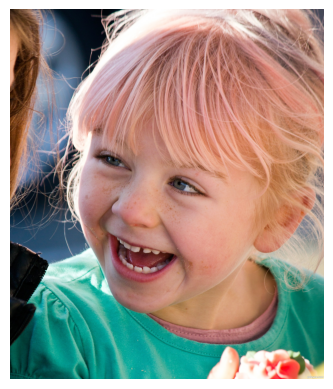

In [12]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.axis(False)

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 151 files belonging to 2 classes.


In [14]:
data_iterator = data.as_numpy_iterator() #helpful when using very large dataset
data_iterator

In [15]:
batch = data_iterator.next()
batch

(array([[[[1.24000000e+02, 1.73000000e+02, 2.40000000e+02],
          [1.24000000e+02, 1.73000000e+02, 2.40000000e+02],
          [1.24000000e+02, 1.73000000e+02, 2.40000000e+02],
          ...,
          [1.24000000e+02, 1.73000000e+02, 2.40000000e+02],
          [1.24000000e+02, 1.73000000e+02, 2.40000000e+02],
          [1.24000000e+02, 1.73000000e+02, 2.40000000e+02]],
 
         [[1.24000000e+02, 1.73000000e+02, 2.40000000e+02],
          [1.24000000e+02, 1.73000000e+02, 2.40000000e+02],
          [1.24000000e+02, 1.73000000e+02, 2.40000000e+02],
          ...,
          [1.24000000e+02, 1.73000000e+02, 2.40000000e+02],
          [1.24000000e+02, 1.73000000e+02, 2.40000000e+02],
          [1.24000000e+02, 1.73000000e+02, 2.40000000e+02]],
 
         [[1.24000000e+02, 1.73000000e+02, 2.40000000e+02],
          [1.24000000e+02, 1.73000000e+02, 2.40000000e+02],
          [1.24000000e+02, 1.73000000e+02, 2.40000000e+02],
          ...,
          [1.24000000e+02, 1.73000000e+02, 2.4000

In [16]:
# 0 for happy
# 1 for sad
batch[1]

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

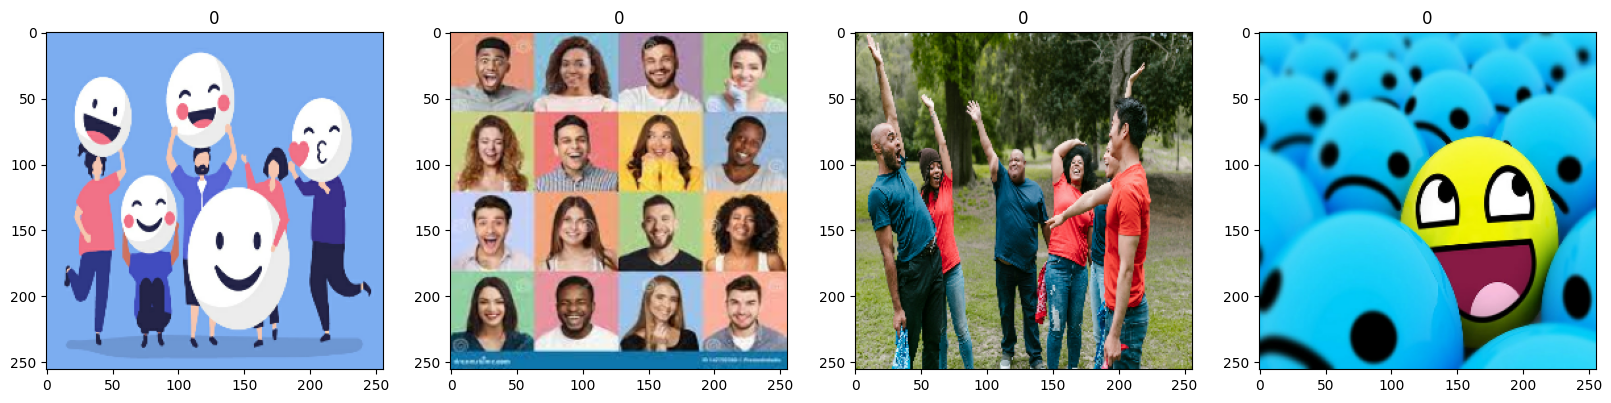

In [17]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

## 2 Preprocess data

### 2.1 Scale the data

In [18]:
data = data.map(lambda x,y: (x/255,y))

In [19]:
scaled_iterator = data.as_numpy_iterator()

In [20]:
batch = scaled_iterator.next()

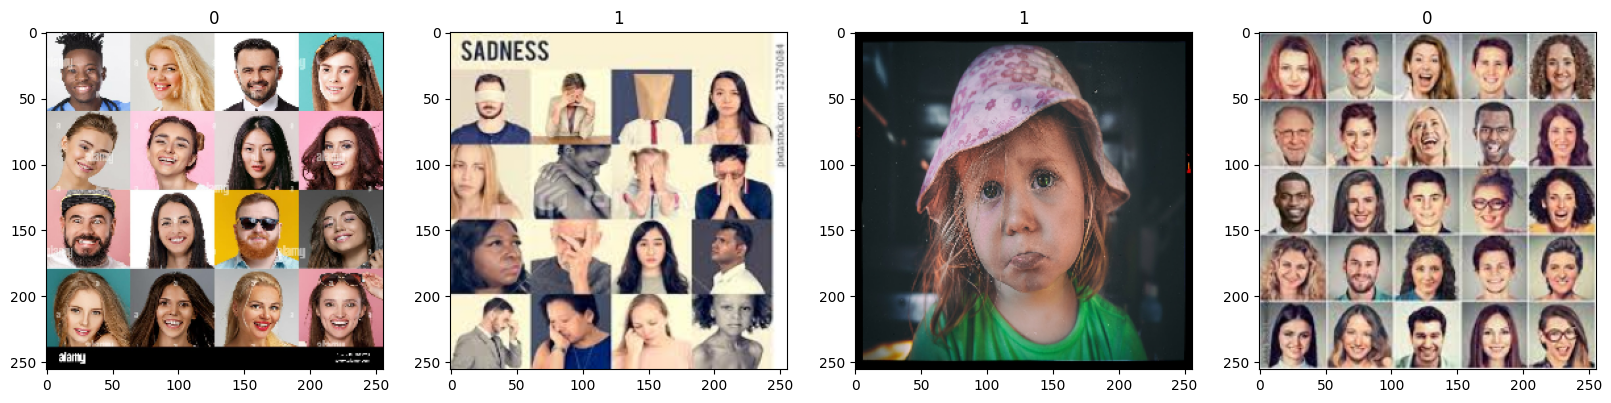

In [21]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [22]:
batch[0].min(),batch[0].max()

(0.0, 1.0)

### 2.2 Split the data

In [23]:
#check total batches
len(data)

5

In [24]:
train_size = int(len(data) * 0.7)
test_size = int(len(data) * 0.1) + 1
validation_size = int(len(data) * 0.2)

In [25]:
print(train_size+test_size+validation_size)

5


In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(validation_size)
test = data.skip(train_size+validation_size).take(test_size)

In [27]:
len(train),len(test),len(val)

(3, 1, 1)

## 3 Deep learning model

### 3.1 Build deep learning model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense, Flatten,Dropout

In [66]:
model = Sequential()

In [67]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [68]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 16)      

### 3.2 Train

In [70]:
from genericpath import exists
logdir= 'logs'
if not logdir:
  os.mkdir(path=logdir)
else:
  print('Logs file already exists')

Logs file already exists


In [71]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [72]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 15s 3s/step - loss: 1.3001 - accuracy: 0.4688 - val_loss: 1.0756 - val_accuracy: 0.3438
Epoch 2/20
3/3 [==============================] - 13s 4s/step - loss: 0.8193 - accuracy: 0.5104 - val_loss: 0.6704 - val_accuracy: 0.5000
Epoch 3/20
3/3 [==============================] - 16s 5s/step - loss: 0.6727 - accuracy: 0.5521 - val_loss: 0.6712 - val_accuracy: 0.5625
Epoch 4/20
3/3 [==============================] - 16s 4s/step - loss: 0.6702 - accuracy: 0.5833 - val_loss: 0.6591 - val_accuracy: 0.6562
Epoch 5/20
3/3 [==============================] - 13s 4s/step - loss: 0.6640 - accuracy: 0.5938 - val_loss: 0.6383 - val_accuracy: 0.6250
Epoch 6/20
3/3 [==============================] - 14s 4s/step - loss: 0.6200 - accuracy: 0.6562 - val_loss: 0.6010 - val_accuracy: 0.5625
Epoch 7/20
3/3 [==============================] - 14s 5s/step - loss: 0.5821 - accuracy: 0.5938 - val_loss: 0.4732 - val_accuracy: 0.7500
Epoch 8/20
3/3 [==================

In [73]:
hist

### 3.3 Plot performance

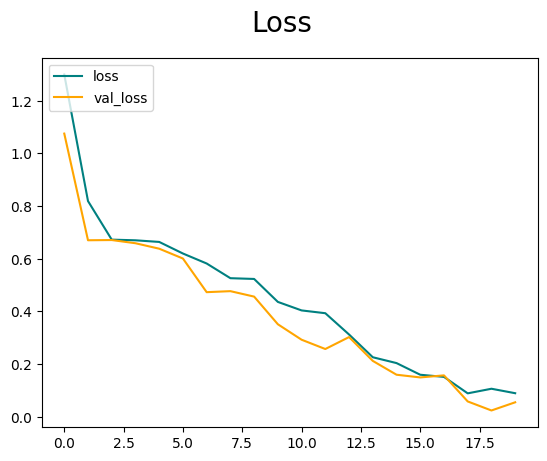

In [74]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal', label='loss')
plt.plot(hist.history['val_loss'],color='orange', label='val_loss')
plt.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

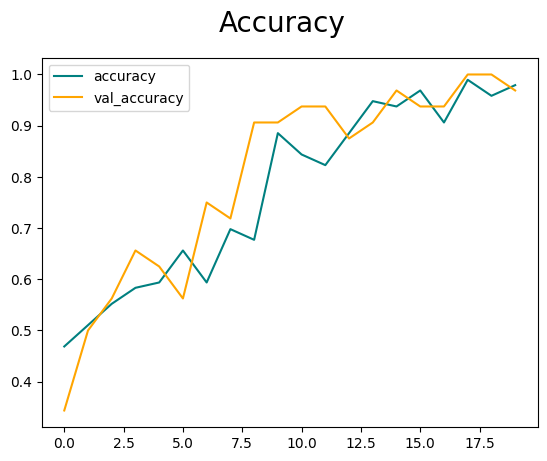

In [75]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange', label='val_accuracy')
plt.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

## 4 Evaluate performance

### 4.1 Evaluate

In [76]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [77]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [78]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 0s 442ms/step


In [79]:
print(f'Precision: {pre.result().numpy()} | Recall: {re.result().numpy()} | Accuracy: {acc.result().numpy()}')

Precision: 1.0 | Recall: 1.0 | Accuracy: 1.0


### 4.2 Test

In [80]:
testdata_path = Path('testdata/')
if testdata_path.is_dir():
  print(f'{testdata_path} path already exists.....')
else:
  print(f'Creating {testdata_path} path.....')
  testdata_path.mkdir(parents=True,exist_ok=True)

testdata path already exists.....


In [84]:
# Bringing testdata
with open('/content/testdata/happytest.png','wb') as f:
  request = requests.get('https://github.com/Rhythm1821/Colab-Project-Data/raw/main/image-classification/testdata/happytest.png')
  f.write(request.content)
with open('/content/testdata/sadtest.png','wb') as f:
  request = requests.get('https://github.com/Rhythm1821/Colab-Project-Data/raw/main/image-classification/testdata/sadtest.png')
  f.write(request.content)

In [91]:
def classify(yhat:float):
  if yhat < 0.5:
    print('Predicted class is happy')
  else:
    print('Predicted class is sad')

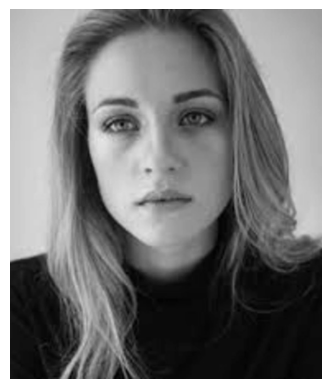

In [93]:
sadtest = cv2.imread('/content/testdata/sadtest.png')
plt.imshow(cv2.cvtColor(sadtest,cv2.COLOR_BGR2RGB))
plt.axis(False)
plt.show()

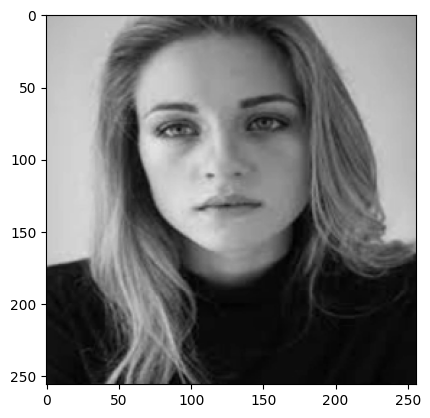

In [94]:
resize = tf.image.resize(sadtest,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [95]:
yhat = model.predict(np.expand_dims(resize/255,0)) #expand_dims because the nn expects us to pass the batch of images and not a single image, so expand_dims encapsulates it
yhat

1/1 [==============================] - 0s 40ms/step


array([[0.8951973]], dtype=float32)

In [96]:
classify(yhat)

Predicted class is sad


### 5 Save the model

### 5.1 Save the model

In [103]:
from tensorflow.keras.models import load_model

In [109]:
model.save(os.path.join('models','happysadmodel.h5'))

In [110]:
if not Path('models').is_dir():
  Path('models').mkdir(parents='root',exist_ok=True)
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [118]:
resize = tf.image.resize(happytest,(256,256))
yhat = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 63ms/step


In [119]:
classify(yhat)

Predicted class is sad
